In [2]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os



In [17]:
data_dir = 'D:\\all_new_projects\\machine_learning\\lis-image-classification\\dataset'

In [18]:
classes = os.listdir(data_dir)
classes

['bhabuk', 'bishnu', 'sunil', 'suraj']

In [19]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=1337,        
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 data_dir,
    validation_split=0.3,
    subset="validation",
    seed=1337,        
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes   
)

Found 48 files belonging to 4 classes.
Using 34 files for training.
Found 48 files belonging to 4 classes.
Using 14 files for validation.


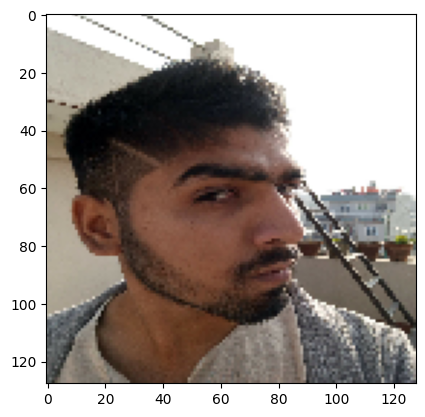

In [6]:
from matplotlib import pyplot as plt
for images, labels in train_ds:
  plt.imshow(images[1].numpy().astype("uint8"))
  break

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.models import Sequential

In [26]:
model = Sequential()

# 1st layer
model.add(Conv2D(128, (3,3), activation="relu",   input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th layer
model.add(Flatten())

model.add(Dense(len(classes), activation="sigmoid"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [38]:
print(type(val_ds))

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>


In [39]:
history = model.fit(train_ds, epochs=15, batch_size=32, validation_data=val_ds, callbacks=[callback])

Epoch 1/15
2/2 [==============================] - 3s 624ms/step - loss: 0.7414 - accuracy: 0.7353 - val_loss: 2.6154 - val_accuracy: 0.3571
Epoch 2/15
2/2 [==============================] - 3s 656ms/step - loss: 0.2674 - accuracy: 0.9412 - val_loss: 3.2934 - val_accuracy: 0.4286
Epoch 3/15
2/2 [==============================] - 3s 657ms/step - loss: 0.4416 - accuracy: 0.8529 - val_loss: 2.2719 - val_accuracy: 0.4286
Epoch 4/15
2/2 [==============================] - 3s 672ms/step - loss: 0.1243 - accuracy: 0.9412 - val_loss: 2.1033 - val_accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 3s 643ms/step - loss: 0.0882 - accuracy: 0.9706 - val_loss: 2.4165 - val_accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 3s 663ms/step - loss: 0.1066 - accuracy: 0.9706 - val_loss: 2.6936 - val_accuracy: 0.4286
Epoch 7/15
2/2 [==============================] - 3s 689ms/step - loss: 0.0570 - accuracy: 0.9706 - val_loss: 2.7087 - val_accuracy: 0.5000


In [42]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

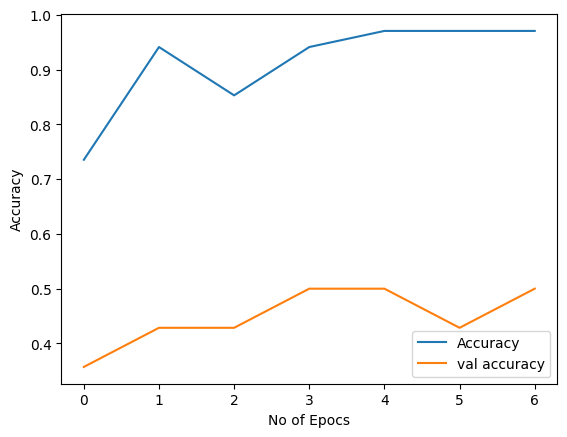

In [43]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.xlabel('No of Epocs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'val accuracy'])
plt.show()

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']

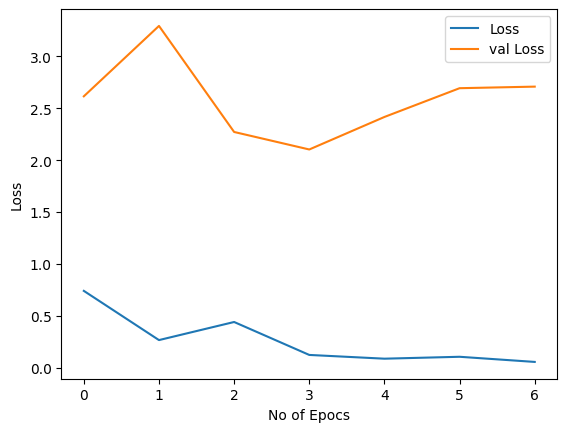

In [46]:
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('No of Epocs')
plt.ylabel('Loss')
plt.legend(['Loss', 'val Loss'])
plt.show()

In [47]:
import cv2
def prepare(filepath):
  IMG_SIZE = 128
  img_array = cv2.imread(filepath)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [48]:
classes

['bhabuk', 'bishnu', 'sunil', 'suraj']

In [56]:
import numpy as np
personMap = {
    0: 'bhabuk',
    1: 'bishnu',
    2: 'sunil',
    3: 'suraj'
}

def predict_image(filepath):
    index = np.argmax(model.predict([prepare(filepath)]))
    print(index)
    return personMap[index]

In [57]:
predict_image('dataset\\bhabuk\\PXL_20230517_173554039.jpg')

1/1 [==============================] - 0s 76ms/step
2


'sunil'